# Assignment 7: Anomaly detection using unsupervised learning
## Daisy Pinaroc

Company: **Nike**

Company code: "NKE"

## Step 2: Data downloading and exploration

In [257]:
# Download data for Nike for the last 2 years using the yahoo finance API
import yfinance as yf

# Loading data into a DataFrame
data = yf.download('NKE', start='2021-03-24', end='2023-03-24')

[*********************100%***********************]  1 of 1 completed


### Shallow exploratory analysis
(i.e., clean/denoise the data, describe columns, print data statistic)

In [258]:
# Check if pandas are already installed
# If not, install it and then import

try:
    import pandas as pd
except:
    import pandas

# Importing more libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [259]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-24,136.449997,137.919998,132.880005,133.160004,130.654572,8157600
2021-03-25,127.050003,129.389999,125.440002,128.639999,126.219620,18475800
2021-03-26,131.600006,133.190002,129.770004,132.990005,130.487793,10010500
2021-03-29,132.940002,133.910004,130.660004,133.490005,130.978378,7153900
2021-03-30,132.350006,133.350006,131.220001,132.949997,130.448532,6026600


### Column Descriptions
* **Open**: The price at which the financial security opens in the market when trading begins ([1]). 
* **High**: Refers to a security's highest trading price within one day. It's represented by the highest point on a day's stock chart ([2]).
* **Low**: A security's lowest trading price within one day. Represented by lowest point on a day's stock chart ([2]).
* **Close**: The last price at which a stock trades during a regular trading session ([3]).
* **Adj ("Adjusted") Close**: The closing price after adjustments for all applicable splits and dividend distributions. This data is adjusted using appropriate split and dividend multipliers ([4]).
* **Volume**: The number of shares traded in a particular stock, index, or other investment over a specific period of time ([5]).

*All prices are in USD (U.S. Dollars)*

[1]: https://economictimes.indiatimes.com/definition/open
[2]: https://www.investopedia.com/terms/t/todayshigh.asp#:~:text=and%20financial%20planning.-,What%20Is%20Today's%20High%3F,trading%20day's%20intraday%20low%20price
[3]: https://www.investor.gov/introduction-investing/investing-basics/glossary/closing-price#:~:text=%22Closing%20price%22%20generally%20refers%20to,4%3A00%20p.m.%20Eastern%20Time.
[4]: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
[5]: https://www.fidelity.com/viewpoints/active-investor/stock-volume#:~:text=Volume%20is%20simply%20the%20number,million%20shares%20traded%20per%20day.*

In [260]:
# Showing last few rows of data
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-17,121.169998,121.730003,118.669998,120.389999,120.389999,12863200
2023-03-20,120.989998,122.680000,119.809998,121.199997,121.199997,7594100
2023-03-21,123.500000,126.059998,122.970001,125.610001,125.610001,15078800
2023-03-22,123.660004,125.260002,119.330002,119.500000,119.500000,17625500
2023-03-23,120.470001,123.269997,119.470001,120.970001,120.970001,7628100


In [261]:
# Checking and removing duplicates
data = data.drop_duplicates()

# Checking and cleaning rows with NULL entries
data = data.dropna()

# Checking data types of columns using info(), also checking for completeness
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2021-03-24 to 2023-03-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [262]:
# Checking how many rows and columns there are in the dataset
data.shape

(504, 6)

In [263]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,131.851190,133.351032,130.357758,131.833076,130.285172,7.080458e+06
std,23.775664,23.706329,23.732415,23.705658,22.972570,4.079103e+06
min,83.129997,86.199997,82.220001,83.120003,82.630043,2.658600e+06
25%,112.782501,113.767500,110.642502,112.787498,111.749825,5.157825e+06
50%,129.805000,131.099998,128.220005,129.989998,128.150620,6.076600e+06
75%,152.267502,153.600006,150.527496,152.247505,149.886333,7.813825e+06
max,176.350006,179.100006,175.500000,177.509995,174.809570,4.817610e+07


In [264]:
corr_features = data[["Open", "High", "Low", "Close","Adj Close","Volume"]] 

In [265]:
# Finding correlation coefficients between features
correlation = corr_features.corr()
print(correlation['Open'].sort_values(ascending = False), '\n')

correlation = corr_features.corr()
print(correlation['High'].sort_values(ascending = False), '\n')

correlation = corr_features.corr()
print(correlation['Low'].sort_values(ascending = False), '\n')

correlation = corr_features.corr()
print(correlation['Close'].sort_values(ascending = False), '\n')

correlation = corr_features.corr()
print(correlation['Adj Close'].sort_values(ascending = False), '\n')

correlation = corr_features.corr()
print(correlation['Volume'].sort_values(ascending = False), '\n')

Open         1.000000
High         0.998829
Low          0.998536
Close        0.996725
Adj Close    0.996384
Volume      -0.248166
Name: Open, dtype: float64 

High         1.000000
Open         0.998829
Low          0.998602
Close        0.998366
Adj Close    0.998104
Volume      -0.239173
Name: High, dtype: float64 

Low          1.000000
Close        0.998742
High         0.998602
Open         0.998536
Adj Close    0.998452
Volume      -0.257081
Name: Low, dtype: float64 

Close        1.000000
Adj Close    0.999759
Low          0.998742
High         0.998366
Open         0.996725
Volume      -0.251581
Name: Close, dtype: float64 

Adj Close    1.000000
Close        0.999759
Low          0.998452
High         0.998104
Open         0.996384
Volume      -0.253250
Name: Adj Close, dtype: float64 

Volume       1.000000
High        -0.239173
Open        -0.248166
Close       -0.251581
Adj Close   -0.253250
Low         -0.257081
Name: Volume, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Features with Volume'}>

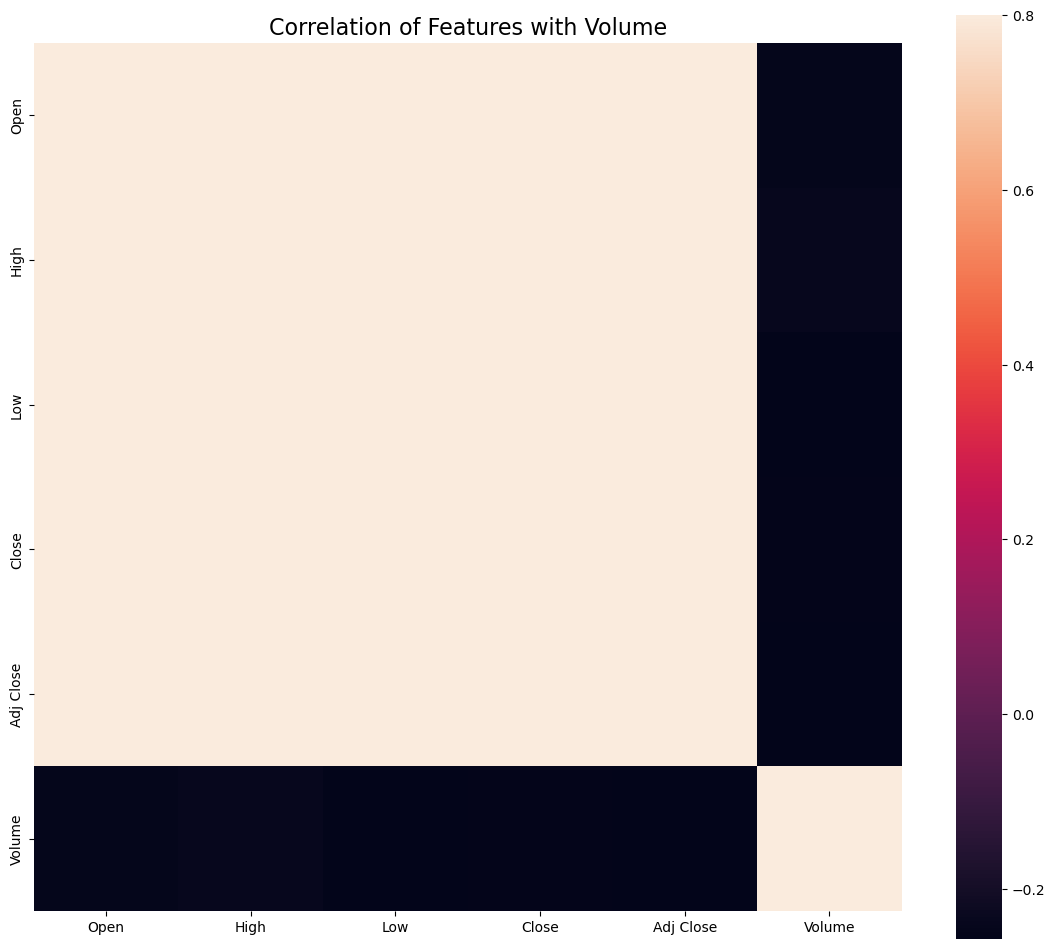

In [266]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Features with Volume',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

## Initial Insights

* It seems like "Volume" isn't as strongly correlated to the others (only has a correlation coefficient of -0.2). Because of this, we probably won't use Volume as one of our features.
* When first looking at the data (calling data.head()), I noticed that Volume was a very high value compared to the other columns. Additionally, when doing data.describe(), I saw that Volume's values for the summary statistics were significantly higher.

## Step 3: Finding out company’s anomalous behavior 

### Feature Definition & Engineering

**Feature Explanations**

We'll choose the following features for anomaly detection:

* **Open**
    * Has a very strong correlation with the other features (at least 0.99 correlation coefficient): High, Low, Close, and Adj Close
    * In looking at the column descriptions, we see that Open is heavily related to the above mentioned features as it talks about trade price.
* **High**
    * Like Open, it has a very strong correlation (0.99) with most of the dataframe columns (only has a weak correlation with Volume).
    * The column description is also heavily related to the descriptions of Open, Low, Close, Adj Close since it's talking about trade price
* **Low**
    * Is very strongly correlated with most of the other features, but NOT Volume
    * Column description is closely related to the others because it talks about trade price as well.
* **Close**
    * After finding the correlation coefficients, we see that this feature has a strong correlation with Open, High, Low, and Adj Close (0.99). 
    * Not only is its description related to the descriptions of High, Low, and Adj Close (because it talks about trade price), but it's also closely related to Open because it is the trade price at the end of the day while Open is the trade price at the beginning of the day.
* **Adj Close**
    * Strong correlation with above features (also 0.99)
    * Column description is related to the above features' descriptions since it's also the trade price at the end of a given time period (in this case a day)

**Features that won't be used:**
* **Volume**
    * We will not be using Volume due to it being on a different scale from the other features.
    * It seems like this feature isn't as strongly correlated to the others (only has a correlation coefficient of -0.2). Because of this, we won't use Volume as one of our features.
    * The column description is not related to the others as it talks about the number of shares rather than a final/starting point of trade price.
    




In [267]:
features = data[["Open", "High", "Low", "Close","Adj Close"]] 
features.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-03-24,136.449997,137.919998,132.880005,133.160004,130.654572
2021-03-25,127.050003,129.389999,125.440002,128.639999,126.219620
2021-03-26,131.600006,133.190002,129.770004,132.990005,130.487793
2021-03-29,132.940002,133.910004,130.660004,133.490005,130.978378
2021-03-30,132.350006,133.350006,131.220001,132.949997,130.448532


### Feature Scaling
MinMax scaling will be used because it produced more accurate anomaly detection results (shown later) compared to Standard Scaling. 

In [268]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_transformed = pd.DataFrame()
features_transformed[["Open", 
          "High", "Low", "Close", 
          "Adj Close"]] = scaler.fit_transform(features[["Open", "High", "Low", 
                                                                 "Close", 
                                                                 "Adj Close"]])
features_transformed.head()

,Open,High,Low,Close,Adj Close
0,0.571980,0.556728,0.543096,0.530141,0.520989
1,0.471144,0.464908,0.463336,0.482254,0.472877
2,0.519953,0.505813,0.509756,0.528340,0.519180
3,0.534327,0.513563,0.519297,0.533637,0.524502
4,0.527998,0.507535,0.525300,0.527916,0.518754


In [269]:
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_transformed = pd.DataFrame()
features_transformed[["Open", 
          "High", "Low", "Close", 
          "Adj Close"]] = scaler.fit_transform(features[["Open", "High", "Low", 
                                                                 "Close", 
                                                                 "Adj Close"]])
features_transformed.head()
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nfeatures_transformed = pd.DataFrame()\nfeatures_transformed[["Open", \n          "High", "Low", "Close", \n          "Adj Close"]] = scaler.fit_transform(features[["Open", "High", "Low", \n                                                                 "Close", \n                                                                 "Adj Close"]])\nfeatures_transformed.head()\n'

### Implement Anomaly Detection Algorithm

We will use K-means clustering using scikit-learn's K-means implementation.

In [270]:
# Import KMeans from scikit learn using from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

# Initialize a k-means clustering object with the following config
# n_clusters=2 
# random_state=0
# n_init=1
kmeans_model = KMeans(n_clusters = 2, random_state = 0, n_init = 1)

# Fit the K-means algorithm with the features above
features_transformed = features_transformed.to_numpy()

kmeans_model.fit(features_transformed)

# Once kmeans model is trained, it could be centered
# Finding the centroids
center = kmeans_model.cluster_centers_

In [271]:
# Compute euclidean distance between every point, figure out closest cluster
from scipy.spatial.distance import euclidean

distance_from_nearest_cluster = []
# Loop over data
for row in features_transformed:
    dist_1 = euclidean(row,center[0])
    dist_2 = euclidean(row,center[1])
    # Select the minimum distance and store it in a variable
    min_dist = min([dist_1,dist_2])
    distance_from_nearest_cluster.append(min_dist)

features['distance_from_nearest_cluster'] = distance_from_nearest_cluster
features.head()

,Open,High,Low,Close,Adj Close,distance_from_nearest_cluster
Date,,,,,,
2021-03-24,136.449997,137.919998,132.880005,133.160004,130.654572,0.404500
2021-03-25,127.050003,129.389999,125.440002,128.639999,126.219620,0.237759
2021-03-26,131.600006,133.190002,129.770004,132.990005,130.487793,0.339774
2021-03-29,132.940002,133.910004,130.660004,133.490005,130.978378,0.358611
2021-03-30,132.350006,133.350006,131.220001,132.949997,130.448532,0.350628


## Step 4: Printing the  anomalous data points and writing insights

In [272]:
# Putting top anomalous points in a separate dataframe
features_sorted = features.sort_values(['distance_from_nearest_cluster'], ascending=[False])

# Printing the top M points in the sorted data as anomalous points
features_sorted.head(10)

,Open,High,Low,Close,Adj Close,distance_from_nearest_cluster
Date,,,,,,
2022-09-30,83.300003,86.199997,82.500000,83.120003,82.630043,0.813548
2022-10-03,83.129997,86.470001,82.220001,85.400002,84.896599,0.792925
2022-10-10,87.760002,87.779999,85.070000,86.690002,86.179001,0.738123
2022-10-11,86.040001,88.250000,85.750000,87.989998,87.471329,0.728628
2022-10-07,88.540001,88.760002,86.690002,87.160004,86.646225,0.717399
2022-10-24,87.790001,88.839996,86.239998,88.010002,87.491219,0.714602
2022-10-21,87.019997,88.779999,86.709999,88.500000,87.978325,0.711821
2022-10-20,89.470001,90.580002,86.610001,86.830002,86.318176,0.707970
2022-10-04,87.699997,89.070000,87.110001,88.639999,88.117500,0.703827


Since we would like to see which dates produced points closest to the cluster, we will print the last few points of the dataframe. 

In [273]:
# Printing the last few anomalous points in the dataframe
features_sorted.tail(10)

,Open,High,Low,Close,Adj Close,distance_from_nearest_cluster
Date,,,,,,
2021-09-13,161.559998,162.919998,158.330002,159.520004,157.093277,0.021503
2022-08-16,115.940002,118.470001,115.809998,118.059998,117.027939,0.021386
2021-09-08,162.000000,162.089996,159.750000,160.710007,158.265137,0.018993
2023-02-24,117.970001,118.739998,117.339996,118.040001,117.704384,0.018783
2022-12-27,116.470001,118.199997,115.820000,117.559998,117.225746,0.018520
2022-08-17,116.769997,117.980003,116.410004,117.040001,116.016853,0.018511
2021-07-16,161.619995,161.699997,159.639999,159.850006,157.158890,0.018017
2023-03-10,118.830002,118.989998,116.639999,117.489998,117.489998,0.017027
2021-07-21,160.500000,161.429993,160.009995,161.080002,158.368179,0.015267


### Insights

* **Explain your initial hypothesis**
    * I hypothesized that the company would behave very strangely during the time period of March 2021-December or January 2022. This was my initial hypothesis because of the COVID-19 pandemic, as I thought it would have some kind of effect on Nike's stock market prices. I expected this time period to have multiple anomalous points because of the unusual events that were occurring.
* **Explain your findings**
    * The farthest point from the cluster was on 09/30/2022. This point is anomalous (also called an outlier) and is too far from every cluster. This means that days with a starting trade price of 83.3, highest price of 86.2, lowest price of 82.5, ending trade price of 83.1, and adjusted ending price of 82.6 rarely occur. The day in which this happened is an exception, and shouldn't regularly be expected by those needing this type of data. Overall, the farthest points occurred in October 2022. Based on our results, we could say that this was an unusual month for Nike.
    * The most non-anomalous point occurred on 07/07/2021, meaning that it's not too far from at least 1 cluster. This means that days with a starting trade price of 160.2, highest trade price of 161.5, lowest trade price of 158.3, ending trade price of 160.2, and adjusted ending trade price of 157.5 are common for Nike's stock market. If someone needed to determine whether it would be worthwhile to exchange shares for this company, this could be a good point of reference.
* **Explain whether your method confirmed your hypothesis or not**
    * My method of using KMeans to create clusters refuted my hypothesis because rather than the anomalous point being between the time period of 03/2021-01/2022, it was actually in 1 year after. The time duration where I expected Nike to behave very strangely was when they had usual statistics. 
* **What could be the future improvements?**
    * Using a different anomaly detection method such as principal component analysis (PCA) or autoencoder. 
    * Choosing different features for analysis. Maybe results could improve if feature Volume was used. 
    * Increasing the number of clusters and centroids (i.e. instead of 2 test with 5)